In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [17]:
dset=pd.read_csv('weatherAUS.csv')

In [18]:
dset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [19]:
dset.shape

(145460, 23)

In [20]:
dset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [21]:
dset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [22]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [23]:
dset['Date']=pd.to_datetime(dset['Date'])
dset['year']=dset['Date'].dt.year
dset['month']=dset['Date'].dt.month
dset['Days']=dset['Date'].dt.day
dset=dset.drop('Date',axis=1)
dset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Days
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [24]:
dset.insert(0,'year',dset.pop('year'))
dset.insert(1,'month',dset.pop('month'))
dset.insert(2,'Days',dset.pop('Days'))


In [25]:
dset.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
year,-0.049357,-1.180678
month,0.030343,-1.191880
Days,0.009040,-1.191997
MinTemp,0.021188,-0.483972
MaxTemp,0.220839,-0.224630
Rainfall,9.836225,178.152079
Evaporation,3.761286,45.043266
Sunshine,-0.496480,-0.829459
WindGustSpeed,0.874879,1.418642
WindSpeed9am,0.777630,1.226991


In [26]:
dset.isnull().sum()

year                 0
month                0
Days                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [27]:
missing = pd.DataFrame(dset.isnull().sum(),columns = ['missing values'])

missing['% missing_values']= (missing/len(dset)).round(3)*100
missing

,missing values,% missing_values
year,0,0.0
month,0,0.0
Days,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,0.9
Rainfall,3261,2.2
Evaporation,62790,43.2
Sunshine,69835,48.0
WindGustDir,10326,7.1


In [28]:
dset.drop(['Cloud3pm','Cloud9am','Evaporation','Sunshine'],axis=1,inplace=True)

In [29]:
dset

,year,month,Days,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,Albury,13.4,22.9,0.6,W,44.0,W,...,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008,12,2,Albury,7.4,25.1,0.0,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008,12,3,Albury,12.9,25.7,0.0,WSW,46.0,W,...,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008,12,4,Albury,9.2,28.0,0.0,NE,24.0,SE,...,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008,12,5,Albury,17.5,32.3,1.0,W,41.0,ENE,...,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017,6,21,Uluru,2.8,23.4,0.0,E,31.0,SE,...,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017,6,22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,...,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017,6,23,Uluru,5.4,26.9,0.0,N,37.0,SE,...,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017,6,24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,...,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [30]:
numerical_features=[feature for feature in dset.columns if dset[feature].dtype!='O']

In [31]:
numerical_features

['year',
 'month',
 'Days',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [32]:
discrete_features=[feature for feature in numerical_features if len(dset[feature].unique())<25]

In [33]:
discrete_features

['year', 'month']

In [34]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features]

In [35]:
continous_features

['Days',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [36]:
categorical_features=[feature for feature in dset.columns if dset[feature].dtype=='O']

In [37]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

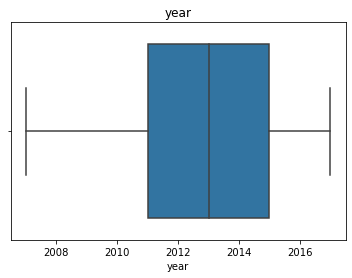

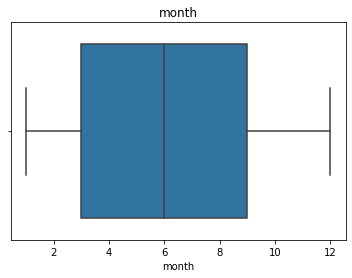

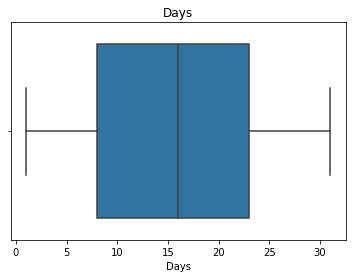

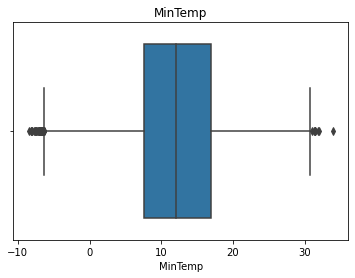

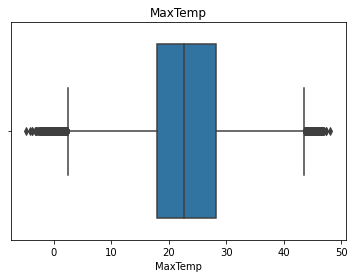

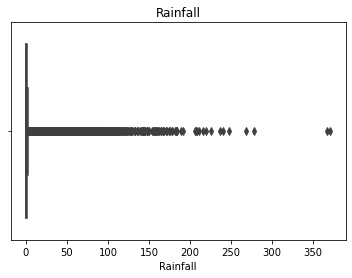

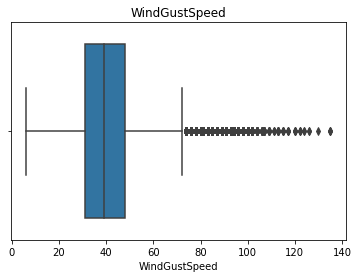

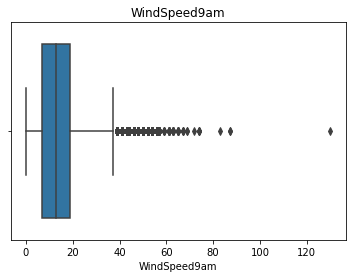

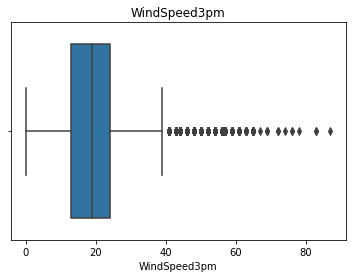

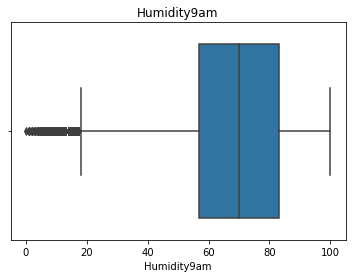

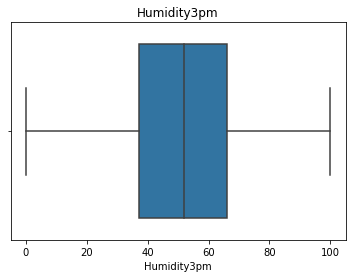

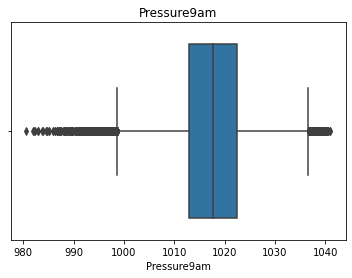

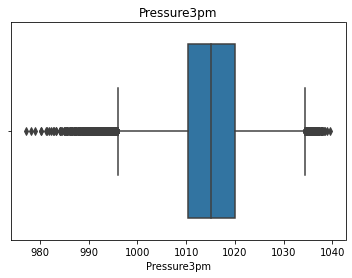

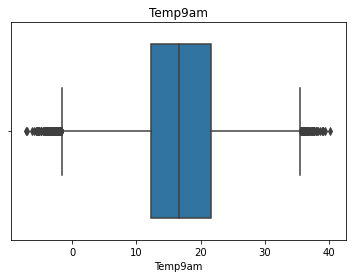

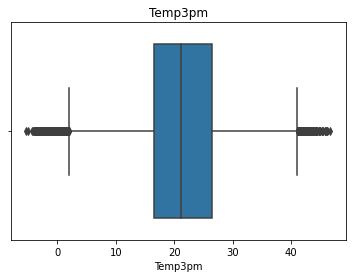

In [38]:
for col in numerical_features:
    sns.boxplot(dset[col])
    plt.title(col)
    plt.show()
 

In [39]:
dset.drop(['Rainfall'],axis=1,inplace=True)

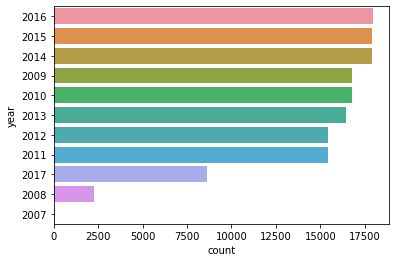

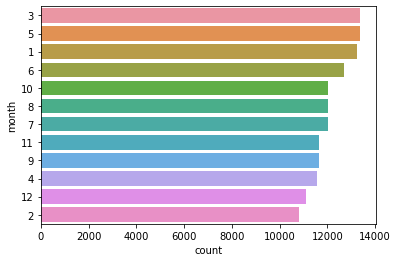

In [40]:
for feature in discrete_features:
    sns.countplot(y=feature,data=dset,order=dset[feature].value_counts().index)
    plt.show()

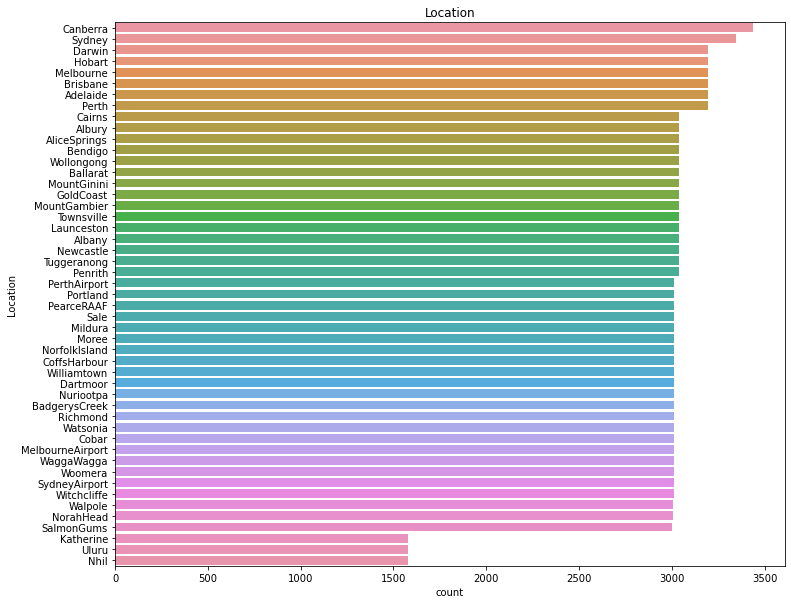

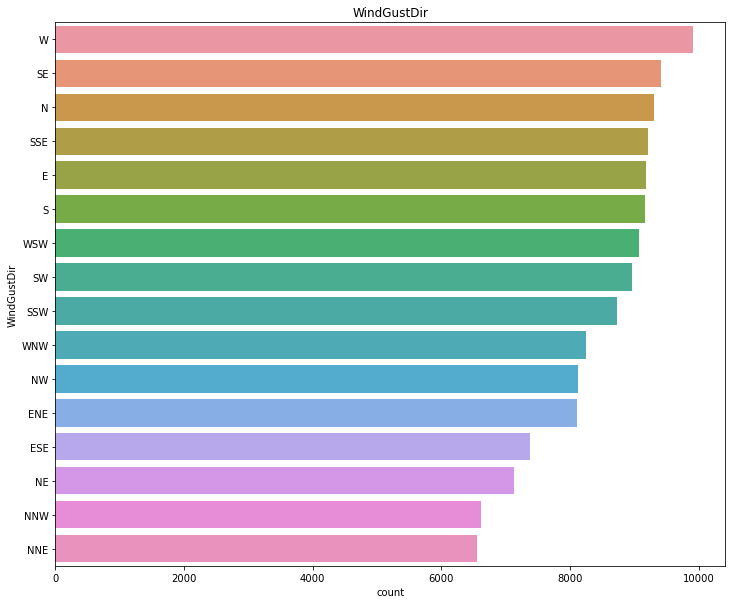

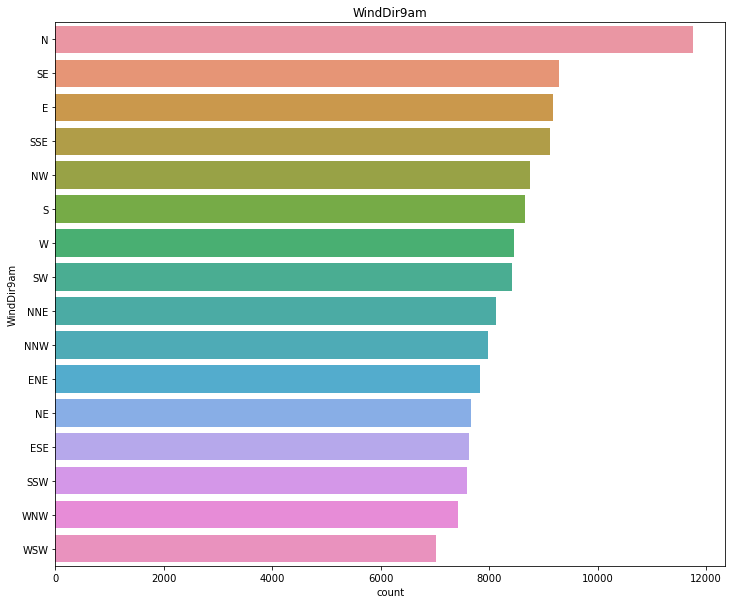

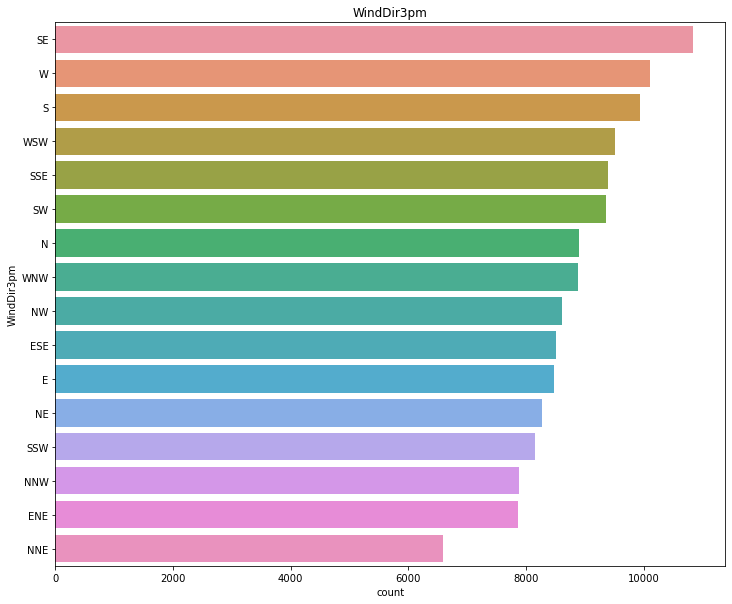

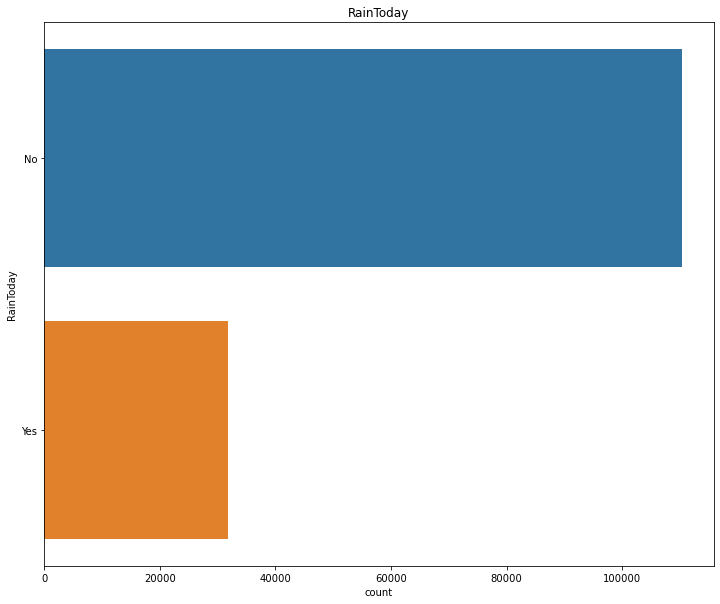

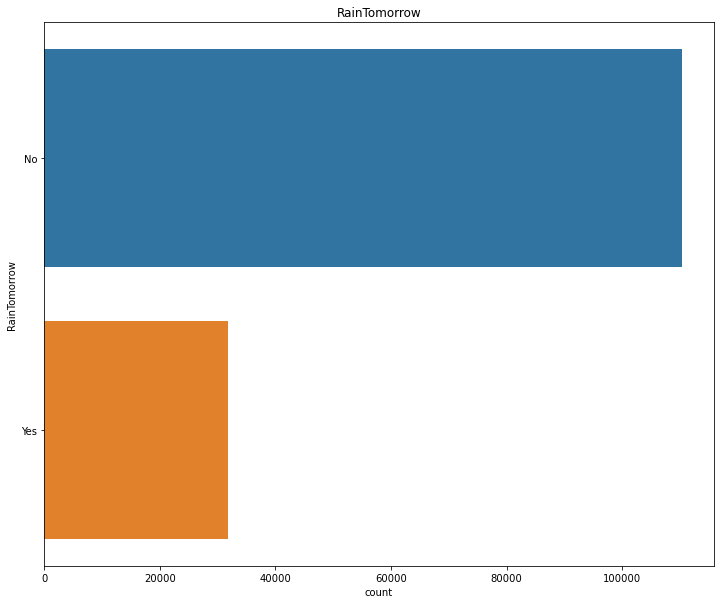

In [41]:
for feature in categorical_features:
    plt.figure(figsize=(12,10))
    sns.countplot(y=feature,data=dset,order=dset[feature].value_counts().index)
    plt.title(feature)
    plt.show()

In [42]:
dset.dropna(how='all',subset=['RainTomorrow'],inplace=True)

In [43]:
for feature in categorical_features:
    print(feature+":",dset[feature].nunique())

Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2
RainTomorrow: 2


In [44]:
dset['RainToday']=dset['RainToday'].replace('Yes',1)
dset['RainToday']=dset['RainToday'].replace('No',0)
dset['RainTomorrow']=dset['RainTomorrow'].replace('Yes',1)
dset['RainTomorrow']=dset['RainTomorrow'].replace('No',0)

In [45]:
dset.isnull().sum()

year                 0
month                0
Days                 0
Location             0
MinTemp            637
MaxTemp            322
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [46]:
continous_features.remove('Rainfall')

In [47]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dset[categorical_features])
dset[categorical_features] = imputer.transform(dset[categorical_features])

In [48]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dset[continous_features])
dset[continous_features] = imputer.transform(dset[continous_features])

In [49]:
dset.isnull().sum()

year             0
month            0
Days             0
Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [50]:
dset[continous_features].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Days,0.008762,-1.192384
MinTemp,0.024345,-0.475952
MaxTemp,0.225763,-0.232095
WindGustSpeed,0.918436,1.740520
WindSpeed9am,0.782261,1.269332
WindSpeed3pm,0.635020,0.844822
Humidity9am,-0.488110,-0.000632
Humidity3pm,0.033042,-0.446433
Pressure9am,-0.098977,0.589664
Pressure3pm,-0.046081,0.473902


In [51]:
X=dset.drop(['RainTomorrow'],axis=1)
y=dset['RainTomorrow']

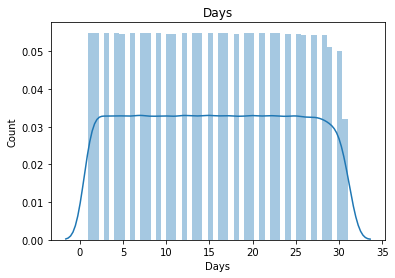

<Figure size 1080x1080 with 0 Axes>

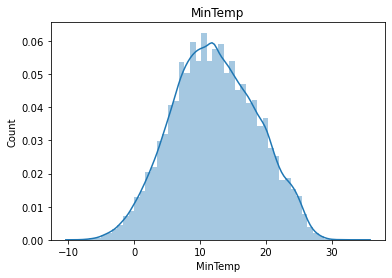

<Figure size 1080x1080 with 0 Axes>

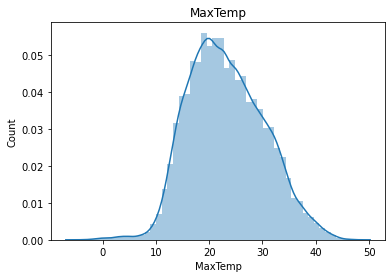

<Figure size 1080x1080 with 0 Axes>

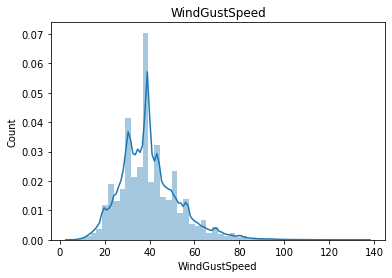

<Figure size 1080x1080 with 0 Axes>

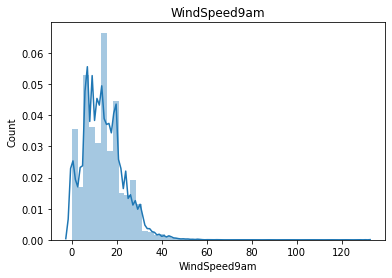

<Figure size 1080x1080 with 0 Axes>

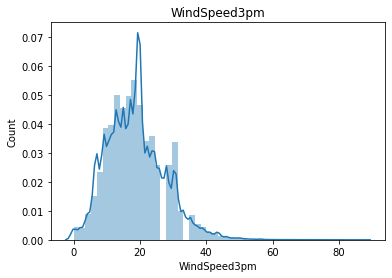

<Figure size 1080x1080 with 0 Axes>

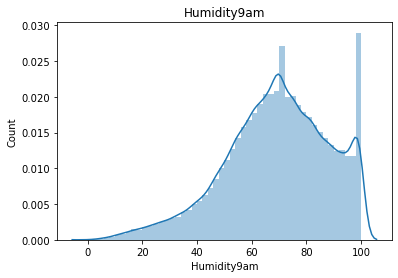

<Figure size 1080x1080 with 0 Axes>

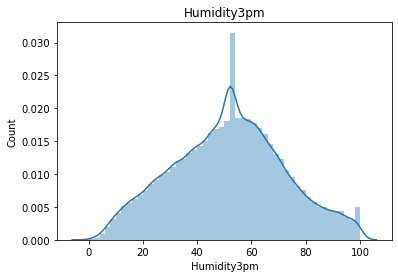

<Figure size 1080x1080 with 0 Axes>

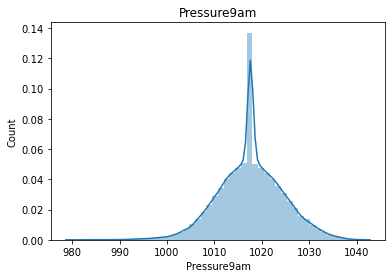

<Figure size 1080x1080 with 0 Axes>

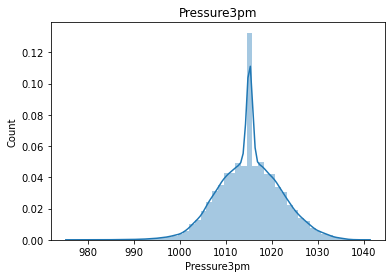

<Figure size 1080x1080 with 0 Axes>

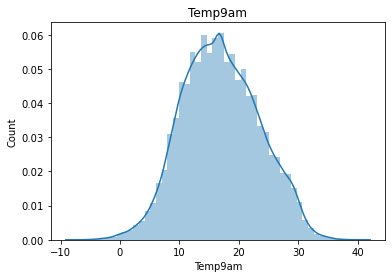

<Figure size 1080x1080 with 0 Axes>

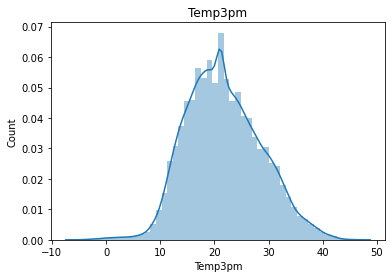

<Figure size 1080x1080 with 0 Axes>

In [52]:
for feature in continous_features:
    data=dset.copy()
    sns.distplot(dset[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [53]:
for feature in continous_features:
    print('\n')
    print(feature)
    print((X[feature]+1).transform([np.log,np.sqrt,np.reciprocal,np.exp]).agg(['skew','kurtosis']).transpose())



Days
                skew   kurtosis
log        -0.988596   0.184162
sqrt       -0.419803  -0.888147
reciprocal  2.503406   6.303572
exp         5.373562  30.101510


MinTemp
                  skew       kurtosis
log                NaN            NaN
sqrt         -0.555678       0.187224
reciprocal         NaN            NaN
exp         340.718025  123195.607578


MaxTemp
                  skew      kurtosis
log                NaN           NaN
sqrt         -0.276326      0.656466
reciprocal         NaN           NaN
exp         131.776840  25066.175803


WindGustSpeed
                  skew      kurtosis
log          -0.282101      0.698298
sqrt          0.324595      0.617823
reciprocal    1.842803      7.116395
exp         217.700535  47392.897771


WindSpeed9am
                  skew       kurtosis
log          -1.442385       2.138943
sqrt         -0.227747       0.011517
reciprocal    3.290713       9.605369
exp         377.084871  142193.000000


WindSpeed3pm
                 

In [54]:
X['WindGustSpeed_log']=np.log(X['WindGustSpeed'])

In [55]:
X['WindSpeed9am_sqrt']=np.sqrt(X['WindSpeed9am'])

In [56]:
X['WindSpeed3pm_sqrt']=np.sqrt(X['WindSpeed3pm'])

In [57]:
X=X.drop(['WindGustSpeed','WindSpeed9am','WindSpeed3pm'],axis=1)

In [58]:
X

,year,month,Days,Location,MinTemp,MaxTemp,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustSpeed_log,WindSpeed9am_sqrt,WindSpeed3pm_sqrt
0,2008,12,1.0,Albury,13.4,22.9,W,W,WNW,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,3.784190,4.472136,4.898979
1,2008,12,2.0,Albury,7.4,25.1,WNW,NNW,WSW,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,3.784190,2.000000,4.690416
2,2008,12,3.0,Albury,12.9,25.7,WSW,W,WSW,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,3.828641,4.358899,5.099020
3,2008,12,4.0,Albury,9.2,28.0,NE,SE,E,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,3.178054,3.316625,3.000000
4,2008,12,5.0,Albury,17.5,32.3,W,ENE,NW,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,3.713572,2.645751,4.472136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017,6,20.0,Uluru,3.5,21.8,E,ESE,E,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,3.433987,3.872983,3.605551
145455,2017,6,21.0,Uluru,2.8,23.4,E,SE,ENE,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,3.433987,3.605551,3.316625
145456,2017,6,22.0,Uluru,3.6,25.3,NNW,SE,N,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,3.091042,3.605551,3.000000
145457,2017,6,23.0,Uluru,5.4,26.9,N,SE,WNW,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,3.610918,3.000000,3.000000


In [59]:
categorical_features.remove('RainTomorrow')

In [60]:
categorical_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [61]:
le=LabelEncoder()
X['Location']=le.fit_transform(X['Location'])

In [62]:
X['WindGustDir']=le.fit_transform(X['WindGustDir'])
X['WindDir9am']=le.fit_transform(X['WindDir9am'])
X['WindDir3pm']=le.fit_transform(X['WindDir3pm'])
X['RainToday']=le.fit_transform(X['RainToday'])

In [63]:
X


,year,month,Days,Location,MinTemp,MaxTemp,WindGustDir,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustSpeed_log,WindSpeed9am_sqrt,WindSpeed3pm_sqrt
0,2008,12,1.0,2,13.4,22.9,13,13,14,71.0,22.0,1007.7,1007.1,16.9,21.8,0,3.784190,4.472136,4.898979
1,2008,12,2.0,2,7.4,25.1,14,6,15,44.0,25.0,1010.6,1007.8,17.2,24.3,0,3.784190,2.000000,4.690416
2,2008,12,3.0,2,12.9,25.7,15,13,15,38.0,30.0,1007.6,1008.7,21.0,23.2,0,3.828641,4.358899,5.099020
3,2008,12,4.0,2,9.2,28.0,4,9,0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,3.178054,3.316625,3.000000
4,2008,12,5.0,2,17.5,32.3,13,1,7,82.0,33.0,1010.8,1006.0,17.8,29.7,0,3.713572,2.645751,4.472136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017,6,20.0,41,3.5,21.8,0,2,0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,3.433987,3.872983,3.605551
145455,2017,6,21.0,41,2.8,23.4,0,9,1,51.0,24.0,1024.6,1020.3,10.1,22.4,0,3.433987,3.605551,3.316625
145456,2017,6,22.0,41,3.6,25.3,6,9,3,56.0,21.0,1023.5,1019.1,10.9,24.5,0,3.091042,3.605551,3.000000
145457,2017,6,23.0,41,5.4,26.9,3,9,14,53.0,24.0,1021.0,1016.8,12.5,26.1,0,3.610918,3.000000,3.000000


In [64]:
X.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
year,-0.042629,-1.182160
month,0.028958,-1.191932
Days,0.008762,-1.192384
Location,0.015691,-1.220990
MinTemp,0.024345,-0.475952
MaxTemp,0.225763,-0.232095
WindGustDir,-0.222513,-1.240664
WindDir9am,0.170232,-1.195759
WindDir3pm,-0.113384,-1.145717
Humidity9am,-0.488110,-0.000632


In [65]:
X['RainToday'].value_counts()

0    110738
1     31455
Name: RainToday, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.feature_selection import VarianceThreshold

In [68]:
var_threshold=VarianceThreshold(threshold=0)

In [69]:
var_threshold.fit(X_train)

VarianceThreshold(threshold=0)

In [70]:
VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

In [71]:
sum(var_threshold.get_support())

19

In [72]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_threshold.get_support()]]

print(len(constant_columns))

0


In [73]:
from sklearn.feature_selection import mutual_info_classif
info = mutual_info_classif(X_train, y_train)


In [74]:
info = pd.Series(info)
info.index = X_train.columns
info.sort_values(ascending=False)

Humidity3pm          0.110629
RainToday            0.041230
Humidity9am          0.038603
Pressure9am          0.027863
WindGustSpeed_log    0.025385
Pressure3pm          0.024405
Temp3pm              0.021047
MaxTemp              0.016410
Location             0.013076
WindGustDir          0.007333
WindDir9am           0.006852
WindDir3pm           0.006620
MinTemp              0.006409
WindSpeed9am_sqrt    0.005979
WindSpeed3pm_sqrt    0.005856
Temp9am              0.002272
year                 0.001976
month                0.001481
Days                 0.001053
dtype: float64

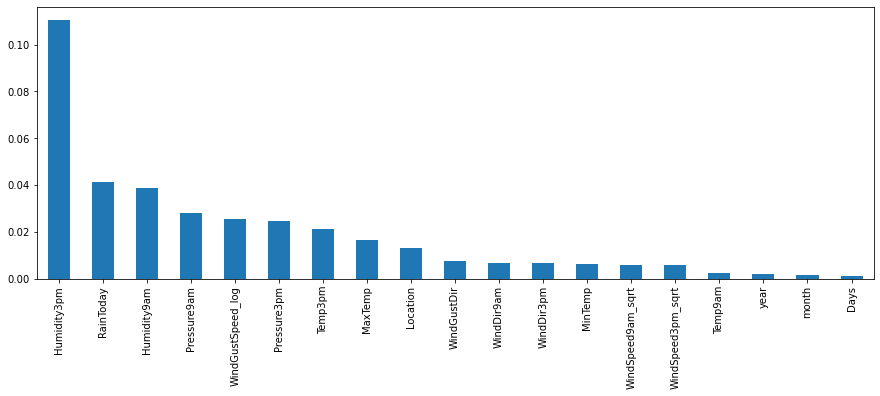

In [75]:
info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [76]:
from sklearn.feature_selection import SelectPercentile
imp_columns = SelectPercentile(mutual_info_classif, percentile=20)
imp_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x000002D4B062FD30>)

In [77]:
X_train.columns[imp_columns.get_support()]

Index(['Humidity9am', 'Humidity3pm', 'Pressure9am', 'RainToday'], dtype='object')

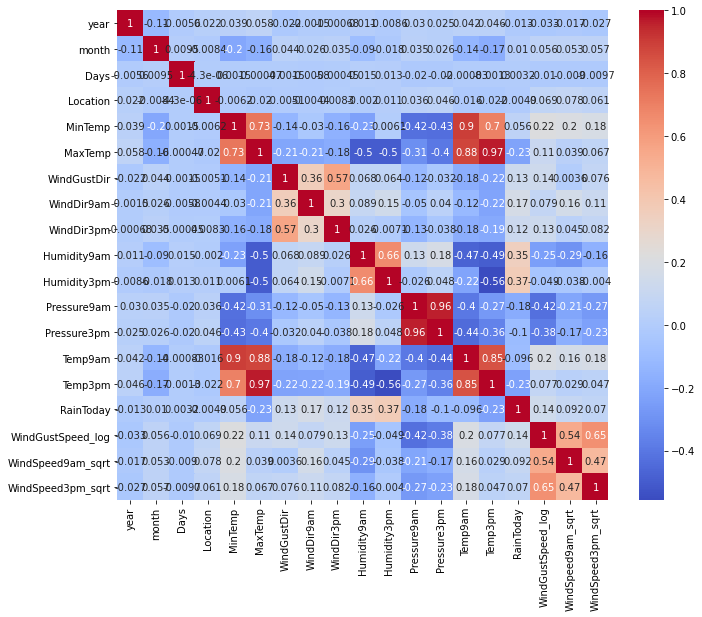

In [78]:
plt.figure(figsize=(11,9))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", )

In [79]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

2

In [81]:
corr_features

{'Pressure3pm', 'Temp3pm'}

In [82]:
X_train=X_train.drop(['Pressure3pm', 'Temp3pm'],axis=1)
X_test=X_test.drop(['Pressure3pm', 'Temp3pm'],axis=1)

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [84]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_train_ms=ms.fit_transform(X_train)
X_test_ms=ms.transform(X_test)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [128]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_sc,y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
y_pred_dtc=dtc.predict(sc.transform(X_test_ms))

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm1 = confusion_matrix(y_test, y_pred_dtc)
print(cm1)
accuracy_score(y_test, y_pred_dtc)

[[22067     0]
 [ 6372     0]]


0.7759414888005908

In [131]:
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train_sc,y_train)

RandomForestClassifier(random_state=0)

In [144]:
y_pred_rfc=rfc.predict(sc.transform(X_test))

In [145]:
cm2= confusion_matrix(y_test, y_pred_rfc)
print(cm2)
accuracy_score(y_test, y_pred_rfc)

[[21149   918]
 [ 3196  3176]]


0.8553394985758993

In [146]:
xgb=XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train_sc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [147]:
y_pred_xgb=xgb.predict(sc.transform(X_test))

In [148]:
cm3 = confusion_matrix(y_test, y_pred_xgb)
print(cm3)
accuracy_score(y_test, y_pred_xgb)

[[20941  1126]
 [ 2871  3501]]


0.8594535672843631

In [127]:
naive_b=GaussianNB()
naive_b.fit(X_train_sc,y_train)

GaussianNB()

In [155]:
cm4 = confusion_matrix(y_test, y_pred_gnb)
print(cm4)
accuracy_score(y_test, y_pred_gnb)

[[18953  3114]
 [ 2583  3789]]


0.7996765005801891

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [154]:
y_pred_knn=knn.predict(sc.transform(X_test))

In [156]:
cm5 = confusion_matrix(y_test, y_pred_knn)
print(cm5)
accuracy_score(y_test, y_pred_knn)

[[20670  1397]
 [ 3425  2947]]


0.8304441084426316

In [149]:
y_pred_gnb=naive_b.predict(sc.transform(X_test))

In [150]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     22067
           1       0.55      0.59      0.57      6372

    accuracy                           0.80     28439
   macro avg       0.71      0.73      0.72     28439
weighted avg       0.81      0.80      0.80     28439



In [95]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     22067
           1       0.50      0.52      0.51      6372

    accuracy                           0.78     28439
   macro avg       0.68      0.69      0.68     28439
weighted avg       0.78      0.78      0.78     28439



In [96]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22067
           1       0.78      0.50      0.61      6372

    accuracy                           0.86     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439



In [97]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22067
           1       0.76      0.55      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439



In [98]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [99]:
y_pred_xgb=y_pred_xgb.reshape(len(y_pred_xgb),1)

In [100]:
y_test=np.array(y_test)

In [101]:
print(np.concatenate((y_pred_xgb.reshape(len(y_pred_xgb),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]